# [Practical Text Classification With Python and Keras - Word Embedding](https://realpython.com/python-keras-text-classification/?fbclid=IwAR0uuIjJZMfOsT0BDBT_-MQnW3MjwZqpFZ3xkEh2TwZLjbgki5zfeiP91KM)

Imagine you could know the mood of the people on the Internet. Maybe you are not interested in its entirety, but only if people are today happy on your favorite social media platform. After this tutorial, you’ll be equipped to do this. While doing this, you will get a grasp of current advancements of (deep) neural networks and how they can be applied to text.

Reading the mood from text with machine learning is called [sentiment analysis](https://en.wikipedia.org/wiki/Sentiment_analysis) , and it is one of the prominent use cases in text classification. This falls into the very active research field of natural language processing (NLP). Other common use cases of text classification include detection of spam, auto tagging of customer queries, and categorization of text into defined topics. So how can you do this?

### Reference:

https://realpython.com/python-keras-text-classification

### Dataset
https://archive.ics.uci.edu/ml/machine-learning-databases/00331/

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import display

## Dataset
This dataset was created for the Paper 'From Group to Individual Labels using Deep Features', Kotzias et. al,. KDD 2015
Please cite the paper if you want to use it :)

It contains sentences labelled with positive or negative sentiment, extracted from reviews of products, movies, and restaurants


### Format:
sentence \t score \n


### Details:

Score is either 1 (for positive) or 0 (for negative)	
The sentences come from three different websites/fields:

```
imdb.com
amazon.com
yelp.com
```

For each website, there exist 500 positive and 500 negative sentences. Those were selected randomly for larger datasets of reviews. 

We attempted to select sentences that have a clearly positive or negative connotaton, the goal was for no neutral sentences to be selected.

For the full datasets look:

- imdb: Maas et. al., 2011 'Learning word vectors for sentiment analysis'
- amazon: McAuley et. al., 2013 'Hidden factors and hidden topics: Understanding rating dimensions with review text'
- yelp: Yelp dataset challenge http://www.yelp.com/dataset_challenge



In [2]:
from google.colab import files

uploaded = files.upload()

Saving sentiment_label_sentences.tar to sentiment_label_sentences.tar


In [3]:
! tar -xvf sentiment_label_sentences.tar
! rm -rf sentiment_label_sentences.tar

sentiment_label_sentences/imdb_labelled.txt
sentiment_label_sentences/yelp_labelled.txt
sentiment_label_sentences/
sentiment_label_sentences/amazon_cells_labelled.txt


In [4]:
! ls sentiment_label_sentences

amazon_cells_labelled.txt  imdb_labelled.txt  yelp_labelled.txt


In [5]:
filepath_dict = {
    'yelp':   'sentiment_label_sentences/yelp_labelled.txt',
    'amazon': 'sentiment_label_sentences/amazon_cells_labelled.txt',
    'imdb':   'sentiment_label_sentences/imdb_labelled.txt'}

df_list = []
for source, filepath in filepath_dict.items():
    df = pd.read_csv(filepath, names=['sentence', 'label'], sep='\t')
    df['source'] = source  # Add another column filled with the source name
    df_list.append(df)

df = pd.concat(df_list)

display(df.info())
display(df.head())

display(print('Label value count:'))
display(df['label'].value_counts())

display(print('Source value count:'))
display(df['source'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2748 entries, 0 to 747
Data columns (total 3 columns):
sentence    2748 non-null object
label       2748 non-null int64
source      2748 non-null object
dtypes: int64(1), object(2)
memory usage: 85.9+ KB


None

,sentence,label,source
0,Wow... Loved this place.,1,yelp
1,Crust is not good.,0,yelp
2,Not tasty and the texture was just nasty.,0,yelp
3,Stopped by during the late May bank holiday of...,1,yelp
4,The selection on the menu was great and so wer...,1,yelp


Label value count:


None

1    1386
0    1362
Name: label, dtype: int64

Source value count:


None

yelp      1000
amazon    1000
imdb       748
Name: source, dtype: int64

### Train/Test Split

In [6]:
from sklearn.model_selection import train_test_split

# Train data from all dataset
X = df['sentence'].values
y = df['label'].values


# Train/test split
X_sentence_train, X_sentence_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=1000)

display(X_sentence_train.shape)
display(y_train.shape)
display(X_sentence_test.shape)
display(y_test.shape)

print('')
display(X_sentence_train[0])
display(y_train[0])

print('')
display(X_sentence_train[5])
display(y_train[5])

(2061,)

(2061,)

(687,)

(687,)

"I'd rather eat airline food, seriously."

0

'Highly recommended A+  '

1

## Baseline Model - LogisticRegression

### Feature Engineering - BoW

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize the sentences
vectorizer = CountVectorizer()
vectorizer.fit(X_sentence_train)
    ### Since you might not have the testing data available during training,
    ### you can create the vocabulary using only the training data

# Vectorization: Transform into number-of-word array
X_train = vectorizer.transform(X_sentence_train)
X_test  = vectorizer.transform(X_sentence_test)

display(X_train.shape)
display(X_test.shape)

(2061, 4506)

(687, 4506)

### Model

In [8]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
score = classifier.score(X_train, y_train)
print("Trainning Accuracy:", score)

Trainning Accuracy: 0.9796215429403202


### Evaluation

In [10]:
score = classifier.score(X_test, y_test)
print("Test Accuracy:", score)

Test Accuracy: 0.8195050946142649


### Apply baseline model to independent sources

In [11]:
scores = dict()
for source in df['source'].unique():
    # X, y
    X = df[df['source'] == source]['sentence'].values
    y = df[df['source'] == source]['label'].values

    # Train/Test split
    X_sentence_train, X_sentence_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=1000)

    # Feature Engineering - BoW
    vectorizer = CountVectorizer()
    vectorizer.fit(X_sentence_train)
    X_train = vectorizer.transform(X_sentence_train)
    X_test  = vectorizer.transform(X_sentence_test)

    # Fit model
    classifier = LogisticRegression()
    classifier.fit(X_train, y_train)

    # Evaluate Accuracy
    score = classifier.score(X_test, y_test)
    scores[source] = score


for source, score in scores.items():
    print('Accuracy for {} data: {:.4f}'.format(source, score))

Accuracy for yelp data: 0.7960
Accuracy for amazon data: 0.7960
Accuracy for imdb data: 0.7487


## MLP Model - Word Embedding

### Feature Engineering - Word Embeddings

In [12]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Torkenize the sentences
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_sentence_train) 
    ### Since you might not have the testing data available during training,
    ### you can create the vocabulary using only the training data

# Tokenization 
X_train = tokenizer.texts_to_sequences(X_sentence_train)
X_test = tokenizer.texts_to_sequences(X_sentence_test)

# vocab size
vocab_size = len(tokenizer.word_index) + 1

# Padding
maxlen = 100
X_train_pad = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test_pad = pad_sequences(X_test, padding='post', maxlen=maxlen)

display(X_train_pad.shape)
display(X_test_pad.shape)

Using TensorFlow backend.


(561, 100)

(187, 100)

### Model

In [13]:
from keras.models import Sequential
from keras import layers
import keras.backend as K

embedding_dim = 50

K.clear_session()
model = Sequential()

# Embedding
model.add(layers.Embedding(
    input_dim=vocab_size, 
                          output_dim=embedding_dim, 
                           input_length=maxlen))

# using a MaxPooling1D/AveragePooling1D 
#     or a GlobalMaxPooling1D/GlobalAveragePooling1D
#     after the embedding layer
model.add(layers.GlobalMaxPool1D())

# MLP
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 50)           128750    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 129,271
Trainable params: 129,271
Non-trainable params: 0
_________________________________________________________________


In [0]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=2,
    verbose=0, mode='auto')

history = model.fit(
    X_train_pad, y_train,
    epochs=50,
    verbose=False,
    validation_split=0.3,
    callbacks=[early_stopping],
    batch_size=10)

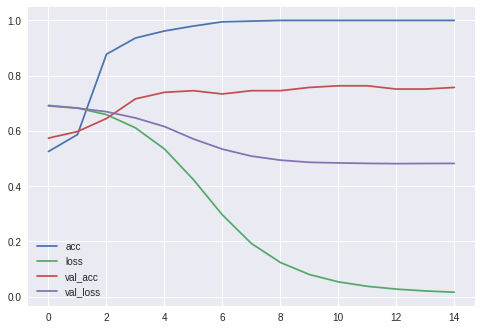

In [15]:
historydf = pd.DataFrame(history.history, index=history.epoch)
historydf.plot();

In [16]:
loss, accuracy = model.evaluate(
    X_train_pad, y_train,
    verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))

Training Accuracy: 0.9269


### Evaluate

In [17]:
loss, accuracy = model.evaluate(
    X_test_pad, y_test,
    verbose=False)
print("Testing Accuracy: {:.4f}".format(accuracy))

Testing Accuracy: 0.7380


## MLP Model - Pretrained Glove dataset

### Feature Engineering - Word Embedding


In [18]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Torkenize the sentences
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_sentence_train) 
    ### Since you might not have the testing data available during training,
    ### you can create the vocabulary using only the training data

# Tokenization 
X_train = tokenizer.texts_to_sequences(X_sentence_train)
X_test = tokenizer.texts_to_sequences(X_sentence_test)

# vocab size
vocab_size = len(tokenizer.word_index) + 1

# Padding
maxlen = 100
X_train_pad = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test_pad = pad_sequences(X_test, padding='post', maxlen=maxlen)

display(X_train_pad.shape)
display(X_test_pad.shape)

(561, 100)

(187, 100)

### Pretrained Glove dataset

In [19]:
# Download pretrained Glove dataset
! wget http://nlp.stanford.edu/data/glove.6B.zip -O glove.zip
! unzip glove.zip -d ./glove
! rm -rf glove.zip
! ls glove

--2018-10-27 03:55:34--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2018-10-27 03:55:35--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.zip’

glove.zip           100%[===================>] 822.24M  7.20MB/s    in 2m 19s  

2018-10-27 03:57:54 (5.91 MB/s) - ‘glove.zip’ saved [862182613/862182613]

Archive:  glove.zip
  inflating: ./glove/glove.6B.50d.txt  
  inflating: ./glove/glove.6B.100d.txt  
  inflating: ./glove/glove.6B.200d.txt  
  inflating: ./glove/glove.6B.300d.txt  
glove.6B.100d.txt  glove.6B.200d.txt  glove.6B.300d.txt  glove.6B.50d

In [20]:
# Exam pretrained dataset
! head -n 1 glove/glove.6B.50d.txt | cut -c-50

the 0.418 0.24968 -0.41242 0.1217 0.34527 -0.04445


In [0]:
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

In [22]:
# Extract embedding matrix
embedding_dim = 50
embedding_matrix = create_embedding_matrix(
    'glove/glove.6B.50d.txt',
    tokenizer.word_index, embedding_dim)

display(embedding_matrix.shape)

# Check non-zero words (already exist in the pretrained dataset)
nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
print('Percentage words covered {}%'.format(
    float(nonzero_elements) / vocab_size * 100.0))

(2575, 50)

Percentage words covered 95.22330097087378%


### Model

In [23]:
from keras.models import Sequential
from keras.layers import Embedding
import keras.backend as K

embedding_dim = 50
maxlen = 100

K.clear_session()
model = Sequential()

# Embedding layer
model.add(layers.Embedding(
    vocab_size, embedding_dim, 
    weights=[embedding_matrix], 
    input_length=maxlen, 
    trainable=True))

# using a MaxPooling1D/AveragePooling1D 
#     or a GlobalMaxPooling1D/GlobalAveragePooling1D
#     after the embedding layer
model.add(layers.GlobalMaxPool1D())

model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 50)           128750    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 129,271
Trainable params: 129,271
Non-trainable params: 0
_________________________________________________________________


In [0]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=2,
    verbose=0, mode='auto')

history = model.fit(
    X_train_pad, y_train,
    epochs=50,
    verbose=False,
    validation_split=0.3,
    callbacks=[early_stopping],
    batch_size=10)

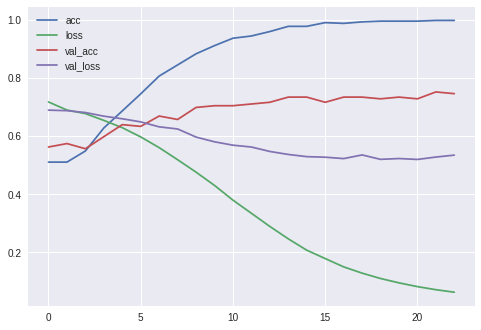

In [25]:
historydf = pd.DataFrame(history.history, index=history.epoch)
historydf.plot();

In [26]:
loss, accuracy = model.evaluate(
    X_train_pad, y_train,
    verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))

Training Accuracy: 0.9216


### Evaluate

In [27]:
loss, accuracy = model.evaluate(
    X_test_pad, y_test, 
    verbose=False)
print("Testing Accuracy: {:.4f}".format(accuracy))

Testing Accuracy: 0.7647
